在前面的 lab 中，我們學習了 tensor、variable、gradient tape 與 model 的概念，在這個 lab 中我們要把這些觀念集合在一起，訓練我們的模型！

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

#### 解決機器學習問題

通常在處理機器學習的問題時會經過以下步驟：
- 取得訓練資料
- 定義 Model
- 定義 Loss Function (輸入訓練資料計算理想的 Loss Value)
- 計算 Loss 的 Gradient 並使用 Optimizer 調整參數
- 評估 Model 效能

在本次 lab 中，我們將會訓練一個 Linear Model : $f(x) = x * W + b$

這一個 Model 中包兩個參數 : $W$ (weight) 與 $b$ (bias)

#### Training Data

在 Supervised Learning 中，訓練資料會包含「輸入資料」$x$ 與「輸出資料」$y$。我們自己生成假資料，並加上 Gaussian Noise。

In [2]:
# 實際的參數
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201

In [3]:
# 生成 vector of x
x = tf.linspace(-2, 2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

In [4]:
# 真正的 linear model
def f(x):
    return x * TRUE_W + TRUE_B

In [5]:
# 產生一些 noise
noise = tf.random.normal([NUM_EXAMPLES])

In [6]:
# 計算 y
y = f(x) + noise

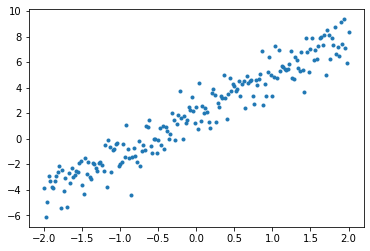

In [7]:
# 畫出所有的 data point
plt.plot(x, y, '.')

#### 定義 Model

我們在前面學過 Model 中的參數因為會不斷變動，因此可以透過 TensorFlow Variable (`tf.Variable`) 來儲存；Model 本身則可以透過 TensorFlow Module (`tf.Module`) 表示。

In [8]:
class MyModel(tf.Module):
    def __init__(self, name=None, **kwargs):
        super().__init__(name, **kwargs)

        # 這個 linear model 只有兩個參數 w 與 b
        # 分別初始化為 5.0 和 0.0
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.w * x + self.b

In [9]:
model = MyModel()

In [10]:
# 查看 model 中的 wieght
model.variables

2022-01-28 23:09:44.435237: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)

In [11]:
# 嘗試輸入資料到 model 中
model(5.0)

<tf.Tensor: shape=(), dtype=float32, numpy=25.0>

#### 定義 Loss Function

In [12]:
# loss function 將會評估目前的 model 有多好
def loss(target_y, predicted_y):
    return tf.reduce_mean(tf.square(target_y - predicted_y))

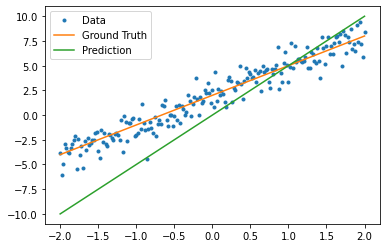

Current loss: 9.67082405090332


In [15]:
# 看看訓練之前的 model 和 ground truth 的差別
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Ground Truth")
plt.plot(x, model(x), label="Prediction")
plt.legend()
plt.show()

print(f'Current loss: {loss(y, model(x))}')

#### 定義 Training Loop

Training Loop 中主要是不斷的重複以下這些操作：
- 輸入 a batch of inputs 到 model 得到 a batch of outputs
- 計算 model 的 outputs 和 label 的 loss
- 利用 `tf.GradientTape` 計算 gradient
- 利用計算出來的 gradient 更新 model 中的參數

In [17]:
# 先將上述 4 件事情包在一個 function 中
def train(model, x, y, learning_rate):
    
    with tf.GradientTape() as t:
        # 輸入 a batch of inputs 到 model 得到 a batch of outputs
        predictions = model(x)

        # 計算 model 的 outputs 和 label 的 loss
        current_loss = loss(y, predictions)
    
    # 利用 `tf.GradientTape` 計算 gradient
    dw, db = t.gradient(current_loss, [model.w, model.b])

    # 利用計算出來的 gradient 更新 model 中的參數
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

In [20]:
# 建立 training loop
epochs = range(20)

def training_loop(model, x, y):

    for epoch in epochs:

        # 每一個 epoch 的主要任務：更新 model
        train(model, x, y, learning_rate=0.1)

        # 計算模型更新過後的 loss
        current_loss = loss(y, model(x))

        # 顯示每一個 epoch 結果
        print(f'Epoch {epoch:2d}: loss={current_loss:1.2f}')

In [21]:
# 實際訓練 model
model = MyModel()
training_loop(model, x, y)

Epoch  0: loss=6.04
Epoch  1: loss=3.96
Epoch  2: loss=2.75
Epoch  3: loss=2.05
Epoch  4: loss=1.64
Epoch  5: loss=1.39
Epoch  6: loss=1.25
Epoch  7: loss=1.16
Epoch  8: loss=1.11
Epoch  9: loss=1.07
Epoch 10: loss=1.05
Epoch 11: loss=1.04
Epoch 12: loss=1.03
Epoch 13: loss=1.03
Epoch 14: loss=1.03
Epoch 15: loss=1.02
Epoch 16: loss=1.02
Epoch 17: loss=1.02
Epoch 18: loss=1.02
Epoch 19: loss=1.02


#### 評估模型的效能

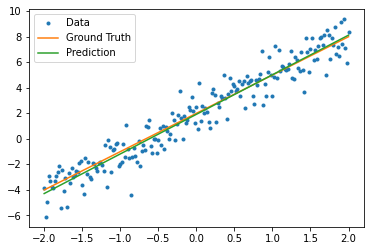

Current loss: 1.0221260786056519


In [22]:
# 看看訓練之前的 model 和 ground truth 的差別
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Ground Truth")
plt.plot(x, model(x), label="Prediction")
plt.legend()
plt.show()

print(f'Current loss: {loss(y, model(x))}')